In [56]:
#import pydicom 
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import glob 
import cv2
from skimage import io
import os
from skimage.color import rgb2hsv, rgb2gray
from skimage.morphology import skeletonize
import copy
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial.distance import directed_hausdorff
import math

def mkdir(super_path,testname):
    #dir_path = test_dir_path+"{}\\".format(testname)
    dir_path = super_path+"{}/".format(testname)
    if os.path.exists(dir_path)==False:
        print("making new directory {}...".format(dir_path))
        os.mkdir(dir_path)
    else:
        print("generating in directory {}...".format(dir_path))
    return dir_path

def read_a_ct(img_path,raw_or_seg="raw",bi=0):
    #img = io.imread(img_path)
    img = cv2.imread(img_path)
    if raw_or_seg =="raw":
        #if bi == 1:
            #img = cv2.bilateralFilter(img, 15, 20, 30)
            #img = cv2.bilateralFilter(img, 15, 20, 30)
        #img = cv2.bilateralFilter(img, 15, 20, 20)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        #print "becase it is a raw, turn img.shape into: ",img.shape
    elif raw_or_seg == "segmentation":
        img = cut_mask(img)
    return img


def cut_mask(seg):
    seg = rgb2hsv(seg)
    mask = seg[:,:,1]
    return mask

def get_img_list(case_list):# original:(rootpath)
    #case_list = glob.glob(root_path+"*/")
    raw_dir_list = []
    seg_dir_list = []
    for m in range(len(case_list)):
        #if os.path.exists(case_list[m]+"norm_seg/"): # norm: only for size.
            #raw_dir_name = "norm_raw/"
            #seg_dir_name = "norm_seg/"
            #print ("norm_raw exist!!")
        #else:
        raw_dir_name = "raw/"
        seg_dir_name = "segmentation/"
        raw_dir_list.append(raw_dir_name)
        seg_dir_list.append(seg_dir_name)
    seg_all = []
    raw_all = []
    for i in range(len(case_list)):
        seg_all += glob.glob(case_list[i]+seg_dir_list[i]+"*.bmp")
    seg_all = sorted(seg_all)
    for j in range(len(seg_all)):
        raw_path = seg_all[j].replace('segmentation','raw')
        raw_path = raw_path.replace('norm_seg','norm_raw')
        raw_all.append(raw_path)
    return raw_all, seg_all # path, eg.:home/chen/material/CT/cas2_post/raw(segmentation)/z0500.bmp

In [64]:
a = glob.glob("/home/chen/unet/materials/CT*/*/")
# print (a)
temp_case = a[0]
raw_all, seg_all = get_img_list([temp_case])

seg_case_name = temp_case.split("/")[6]
print (seg_case_name)

init_img = sorted(glob.glob(temp_case + "segmentation/*.bmp"))[0].split("/")[-1]
init_img = int(init_img[1:5])
print (init_img)

#
"""
raw_img = []
seg_img = []

for i in range(len(seg_all)):
    raw_img.append(read_a_ct(raw_all[i],"raw"))
    seg_img.append(read_a_ct(seg_all[i],"segmentation"))

raw_img = np.array(raw_img)
seg_img = np.array(seg_img)
                   
print (raw_img.shape, seg_img.shape)"""

mcs1_post
388


'\nraw_img = []\nseg_img = []\n\nfor i in range(len(seg_all)):\n    raw_img.append(read_a_ct(raw_all[i],"raw"))\n    seg_img.append(read_a_ct(seg_all[i],"segmentation"))\n\nraw_img = np.array(raw_img)\nseg_img = np.array(seg_img)\n                   \nprint (raw_img.shape, seg_img.shape)'

In [58]:
partition = 16

c = 1
c_cube = 0
cube_idx = []
masked_raw= np.zeros_like(seg_img)


for x in range(0,seg_img.shape[1],partition):
    for y in range(0,seg_img.shape[2],partition):
        for z in range(0,seg_img.shape[0],partition):
            cube = seg_img[x:x+partition,y:y+partition,z:z+partition]
            if np.any(cube!=0):
                cube_idx.append([x,y,z])
                c_cube = c_cube + 1
            c = c+ 1
print ("There are {} cubes in total but only {} of them contain arteries, in seg_img(target)".format(c,c_cube))

for idx in cube_idx:
    x,y,z = idx[0],idx[1],idx[2]
    masked_raw[x:x+partition,y:y+partition,z:z+partition] = raw_img[x:x+partition,y:y+partition,z:z+partition]

save_masked_path = mkdir("/home/chen/unet/material_msk/", seg_case_name)

for i in range(len(masked_man)):
    img_id = "z{:0=4}.bmp".format(init_img+i)
    man_vm =np.zeros((512,512,3))
    man_vm[:,:,2] = (masked_man[i,:,:]>0)*255
    cv2.imwrite(save_masked_path + img_id, man_vm)

There are 24577 cubes in total but only 360 of them contain arteries, in seg_img(target)
making new directory /home/chen/unet/material_msk/mcs1_post/...


PermissionError: [Errno 13] Permission denied: '/home/chen/unet/material_msk/mcs1_post/'

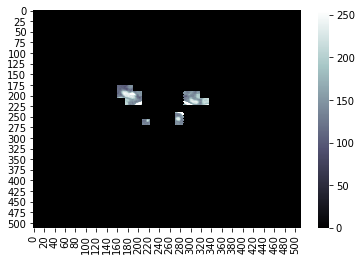

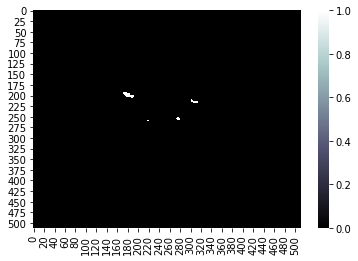